# 1. Data Loading and Preprocessing
Loading, cleaning, and preprocessing the board game dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options and styling
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('seaborn-v0_8-whitegrid')

# Create output directory for plots if it doesn't exist
import os
if not os.path.exists('../plots'):
    os.makedirs('../plots')
if not os.path.exists('../frames'):
    os.makedirs('../frames')

# Loading in the Data

In [11]:
# Load the dataset files
base_path = '../data/'  # Update with your folder path

# Load main games data
print("Loading datasets...")
games_df = pd.read_csv(f'{base_path}games.csv')
mechanics_df = pd.read_csv(f'{base_path}mechanics.csv')
themes_df = pd.read_csv(f'{base_path}themes.csv')
subcategories_df = pd.read_csv(f'{base_path}subcategories.csv')

print(f"Games dataset: {games_df.shape}")
print(f"Mechanics dataset: {mechanics_df.shape}")
print(f"Themes dataset: {themes_df.shape}")
print(f"Subcategories dataset: {subcategories_df.shape}")

# Merge all dataframes
print("\nMerging dataframes...")
merged_df = games_df.copy()

# Merge with mechanics
merged_df = pd.merge(merged_df, mechanics_df, on='BGGId', how='left')

# Merge with themes
merged_df = pd.merge(merged_df, themes_df, on='BGGId', how='left')

# Merge with subcategories
merged_df = pd.merge(merged_df, subcategories_df, on='BGGId', how='left')

print(f"Merged dataframe shape: {merged_df.shape}")

# Get binary columns
mechanics_cols = mechanics_df.columns.drop('BGGId').tolist()
themes_cols = themes_df.columns.drop('BGGId').tolist()
subcategories_cols = subcategories_df.columns.drop('BGGId').tolist()
category_cols = [col for col in games_df.columns if col.startswith('Cat:')]

all_binary_cols = mechanics_cols + themes_cols + subcategories_cols + category_cols
print(f"Total number of binary features: {len(all_binary_cols)}")

# Fill NA values with 0 for binary columns
merged_df[all_binary_cols] = merged_df[all_binary_cols].fillna(0)

# Filter to games with sufficient ratings for reliability
min_ratings = 100
filtered_df = merged_df[merged_df['NumUserRatings'] >= min_ratings].copy()
print(f"\nFiltered dataset (games with at least {min_ratings} ratings): {filtered_df.shape[0]} games")

Loading datasets...
Games dataset: (21925, 48)
Mechanics dataset: (21925, 158)
Themes dataset: (21925, 218)
Subcategories dataset: (21925, 11)

Merging dataframes...
Merged dataframe shape: (21925, 432)
Total number of binary features: 392

Filtered dataset (games with at least 100 ratings): 12239 games


# Basic Data Exploration

In [12]:
# Basic data exploration
print("\nBasic statistics for AvgRating:")
print(filtered_df['AvgRating'].describe())

# Create rating brackets
filtered_df['Rating_Bracket'] = pd.cut(filtered_df['AvgRating'], 
                                       bins=[0, 5, 6, 7, 8, 10],
                                       labels=['<5', '5-6', '6-7', '7-8', '8+'])

print("\nDistribution by rating bracket:")
print(filtered_df['Rating_Bracket'].value_counts().sort_index())


Basic statistics for AvgRating:
count    12239.000000
mean         6.580845
std          0.836808
min          1.162080
25%          6.061080
50%          6.600580
75%          7.149010
max          9.329460
Name: AvgRating, dtype: float64

Distribution by rating bracket:
Rating_Bracket
<5      417
5-6    2375
6-7    5676
7-8    3293
8+      478
Name: count, dtype: int64


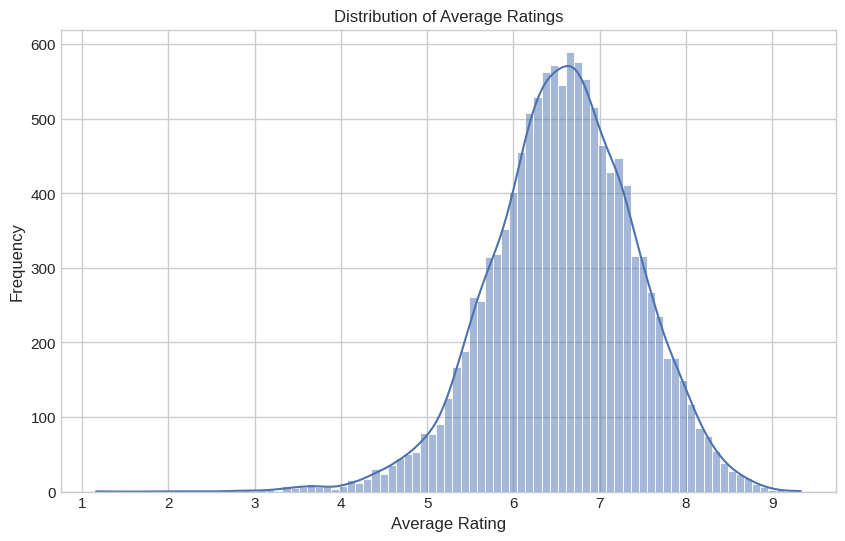

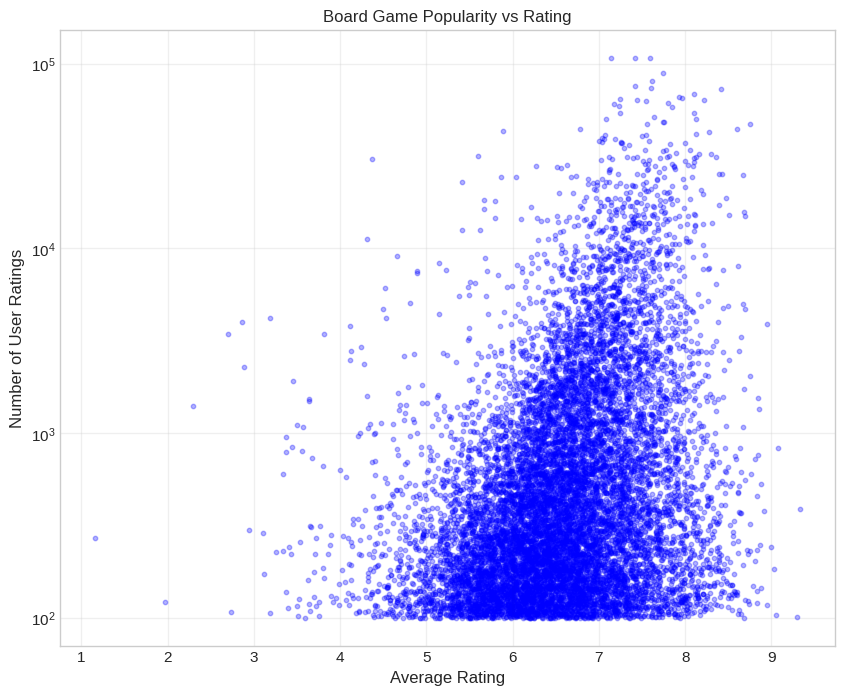

In [16]:
# Plot distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['AvgRating'], kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.savefig('../plots/rating_distribution.png')
plt.show()
plt.close()

# Analyze user ratings (popularity) vs average rating
plt.figure(figsize=(10, 8))
plt.scatter(filtered_df['AvgRating'], filtered_df['NumUserRatings'], 
           alpha=0.3, s=10, c='blue')
plt.title('Board Game Popularity vs Rating')
plt.xlabel('Average Rating')
plt.ylabel('Number of User Ratings')
plt.yscale('log')  # Use log scale for number of ratings
plt.grid(True, alpha=0.3)
plt.savefig('../plots/overall_popularity_vs_rating.png')
plt.show()
plt.close()

In [17]:
# Save processed data for other notebooks
filtered_df.to_csv('../frames/filtered_games.csv', index=False)
np.save('../frames/all_binary_cols.npy', all_binary_cols)
np.save('../frames/mechanics_cols.npy', mechanics_cols)
np.save('../frames/themes_cols.npy', themes_cols)
np.save('../frames/subcategories_cols.npy', subcategories_cols)
np.save('../frames/category_cols.npy', category_cols)